# Importing Libraries

In [1]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [3]:
# Initialises data
yData = np.array([
    100.61920867, 105.0750075 , 110.34324928, 114.53286217, 118.52176954,
    121.49283757, 123.7285879 , 125.19984513, 125.42080213, 124.42424954,
    122.44604054, 119.84084418, 116.98605592, 114.23824334, 111.93276842,
    110.3718956 , 109.79217173, 110.33538253, 111.99645336, 114.60188897,
    117.78763755, 121.03885878, 123.69017798, 125.10810933, 124.73513488,
    122.29644325, 118.00663703, 112.50037917, 106.71747491, 101.72595423,
    98.66749016 , 98.86409209 , 102.29097061, 108.56130214, 116.82247873,
    125.80508565, 133.98722949, 139.79625626, 141.84716552, 139.15049189,
    131.34172362, 118.75215747, 103.3662235 , 87.48181229 , 73.44082405 ,
    63.25764429 , 58.46392386 , 59.79851758 , 66.0124747  , 75.73321216 ,
    87.67923191 , 100.8191912 , 113.55383292, 124.87702738, 133.5304428  ,
    138.28114144, 138.33026548, 133.51653838, 124.54050371, 112.71816784,
    99.82313514 , 88.85894309 , 82.99345495 , 83.10268136 , 88.50493754 ,
    97.82015174 , 109.26014691, 121.68639848, 133.69217125, 144.79775127,
    154.55193041, 162.59119507, 168.6910979 , 172.82935825, 175.19001941,
    176.15207438, 176.31765923, 176.33041808, 176.91472354, 178.63614571,
    182.03565398, 187.50362094, 194.32881918, 201.76572007, 208.15675998,
    211.13553413, 208.67719146, 200.21371219, 186.55701106, 170.00702627,
    153.1604912  , 138.96315394, 400, 126.44500427, 129.36238843,
    137.44332863, 148.55250768, 160.98627784, 172.74545207, 182.69278802,
    190.92970871, 197.88794377, 204.42448509, 211.6392906 , 220.06031268,
    229.69744061, 240.28625326, 250.39956634, 259.71875469, 267.27970338,
    272.65764804, 275.36988084, 275.2137405 , 272.4264097 , 267.65460828,
    261.93430422, 256.51500134, 252.72351726, 251.74785074, 254.53593297,
    260.63347648, 269.22172241, 279.09562897, 288.79503881, 296.85901329,
    302.08283564, 303.68047895, 301.49169428, 295.03654091, 283.5662182 ,
    267.82863771, 249.80890569, 232.19030234, 217.92624667, 209.71624266,
    209.33184297, 217.37414494, 232.18845707, 250.3525906 , 268.55741735,
    283.87845252, 294.05239672, 298.64485763, 298.3342558 , 294.05300935,
    287.18137868, 279.31013752, 271.94150594, 266.11112924, 261.14045469,
    256.34058933, 251.96274544, 248.23173321, 245.45462339, 243.19686203,
    240.26386591, 235.60126397, 228.39016677, 217.86231708, 203.94720292,
    187.88762998, 171.03643826, 156.78174854, 147.52950029, 144.46298815,
    148.42840176, 158.72728469, 174.88134179, 194.65539409, 215.41003443,
    234.45297222, 249.54147215, 259.18011961, 262.86808248, 261.48494989,
    256.63520065, 249.83532046, 242.75373273, 236.07269228, 229.57678938,
    222.9648534 , 215.83852221, 207.61472484, 197.43372485, 184.30182286,
    168.21181014, 149.20265328, 128.75018385, 109.42983315, 94.65700049 ,
    87.46153757 , 89.13259423 , 99.30457851 , 115.3022446  , 132.30075893,
    144.45072097, 147.86442097, 140.89262761, 124.66322504, 102.67824167,
    81.50835727 , 67.68227284 , 66.02676838 , 78.31725889 , 104.45832298,
    142.85523462, 187.04985636, 227.42845553, 253.18115758, 256.71202426])

In [4]:
# Defines constants
WINDOW_SIZE = 15
TIME_STEP = 0.5
NUM_STD = 3

# Finding Anomalies


In [5]:
anomalies = []
rangeData = []

# Loops over each data point after the initial window
for i in range(len(yData) - WINDOW_SIZE):

  # Selects the window - omits previous anomalies
  data = yData[[a for a in np.arange(i, i + WINDOW_SIZE) if a not in anomalies]]

  # Calculates the mean and std of the window
  mean, std = np.mean(data), np.std(data)
  rangeData.append([mean, std])

  # If current value is not within confidence interval - anomaly
  if np.abs(yData[i + WINDOW_SIZE] - mean) > std * NUM_STD:
    anomalies.append(i + WINDOW_SIZE)

means, stds = np.array(rangeData).T

# Plotting the Results

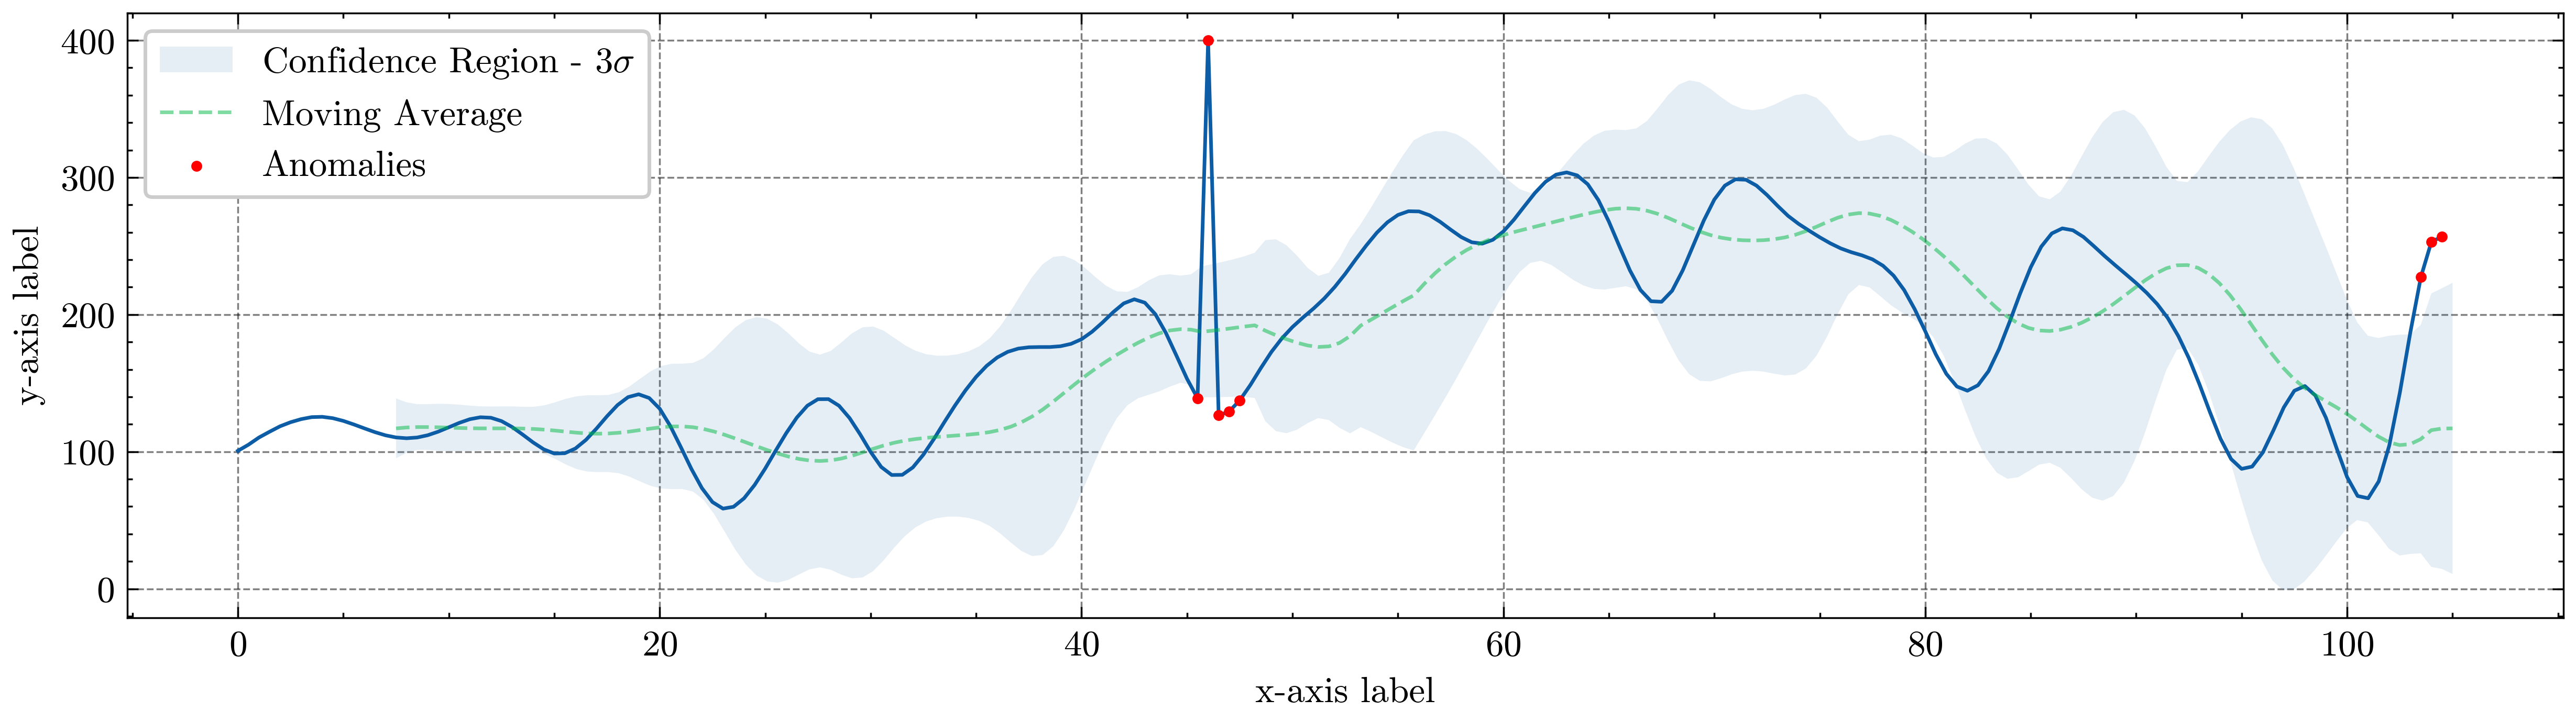

In [6]:
# Initialises settings of the graph
plt.figure(figsize=(12,3), dpi=500)

plt.xlabel("x-axis label")
plt.ylabel("y-axis label")

# Plots initial line
xPlot1 = np.linspace(0, (len(yData) - 1) * TIME_STEP, len(yData))
plt.plot(xPlot1, yData)

# Plots the confidence interval
xPlot2 = np.linspace(WINDOW_SIZE * TIME_STEP, len(yData) * TIME_STEP, len(yData) - WINDOW_SIZE)
plt.fill_between(xPlot2, means + stds * NUM_STD , means - stds * NUM_STD,
                 label='Confidence Region - ' +  r'$' + str(NUM_STD) + '\sigma$', alpha=0.1)

# Plots the window means
plt.plot(xPlot2, means,
         linestyle="--", alpha=0.5, label='Moving Average')

# Plots the anomalous data points
plt.scatter(np.array(anomalies) * TIME_STEP, yData[anomalies],
            color='r', zorder=2, s=4, label='Anomalies')

plt.legend(loc='upper left')
plt.show()